In [1]:
# importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Plotting the size
plt.figure(figsize = (20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [3]:
# Importing the dataset
application_data = pd.read_csv(r"C:\Users\sesa505163\Downloads\application_data.csv")
print(application_data.shape)
application_data.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The main objective of this study is to identify patterns which indicate if a client has difficulty in paying their installments. To know the driving factors (or driver variables) behind loan default i.e. the variables which are strong indicators of default. 

In [4]:
# Steps to find the missing values

# Calculating the total number of missing values
missing_values = application_data.isnull().sum()

# Calculating the % of the missing values
missing_value_percentage = 100 * application_data.isnull().sum() / len(application_data)

# Concatinating the two tables
missing_value_table = pd.concat([missing_values, missing_value_percentage], axis=1)

# Renameing the column names
missing_value_table_columns = missing_value_table.rename(columns={0: 'Number of Missing Values', 1: '% of Total Missing Values'})

# Display the values in sorting order
missing_value_table_columns = missing_value_table_columns[missing_value_table_columns.iloc[:, 1] != 0].sort_values('% of Total Missing Values', ascending=False).round(1)
# print("Total number of missing columns are: " + str(missing_value_table_columns.shape[0]))
# print(missing_value_table_columns.head(100))

In [5]:
# Deleting the Columns for which the missing value is greater than 50%
df = application_data.loc[:, (application_data.isnull().sum() <= len(application_data)/2)]
# df.columns

In general, the missing values issues will happen when there are no data provided/not exists for one or more items. And this is a major problem and can be represented as NAN or None. And to overcome this issue we can treat by using some built-in methods in which the total value doesnt change. 
Few built-in methods can be used :- notnull(), isnull(), replace(), dropna().
We can use isnull() or notnull() to find the missing values in the given dataset
We can even use mean and median

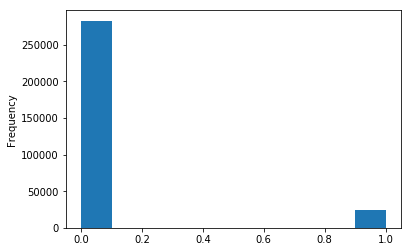

In [6]:
application_data['TARGET'].astype(int).plot.hist();

The graph shows that around 25000 (8%) of the total values are those who make defaults and around 280000 are those who do not make defaults.

In [7]:
# Spliting the Dataframe into two categories "Target = 0" 
df0 = df[df['TARGET'] == 0]
# print (df0)

In [8]:
# Spliting the Dataframe into two categories "Target = 1" , 
df1 = df[df['TARGET'] == 1]
# print (df1)

In [9]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,...,24825.000000,24825.000000,24825.000000,24825.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,-14884.828077,42394.675448,...,0.005720,0.000483,0.000524,0.000564,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783
std,102383.123458,0.0,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,4192.844583,119484.634253,...,0.075416,0.021981,0.022878,0.023741,0.084926,0.106682,0.203941,0.745116,0.643789,1.934063
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,-25168.000000,-16069.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189555.000000,1.0,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,-18037.000000,-2156.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,-14282.000000,-1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,366050.000000,1.0,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,-11396.000000,-379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,-7678.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,17.000000,19.000000,22.000000


In [10]:
df1.dtypes.value_counts()

int64      41
float64    27
object     13
dtype: int64

In [11]:
# Number of unique classes in each object column
df1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               6
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
(df1['DAYS_BIRTH'] / -365).describe()

count    24825.000000
mean        40.780351
std         11.487245
min         21.035616
25%         31.221918
50%         39.128767
75%         49.416438
max         68.953425
Name: DAYS_BIRTH, dtype: float64

In [13]:
# Find the correlation of the positive days since birth and target
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_BIRTH'].corr(application_data['TARGET'])

-0.07823930830982712

The correlation between target and age is -0.078, which interprets that as the age of people increases people are less likely to make faults in repayment

In [14]:
application_data['DOB_Years'] = (application_data['DAYS_BIRTH'] / 365)
application_data['Years_Employed'] = (application_data['DAYS_EMPLOYED'] / 365)

In [15]:
df1['DOB_Years'] = (df1['DAYS_BIRTH'] / -365)
df1['Years_Employed'] = (df1['DAYS_EMPLOYED'] / -365)

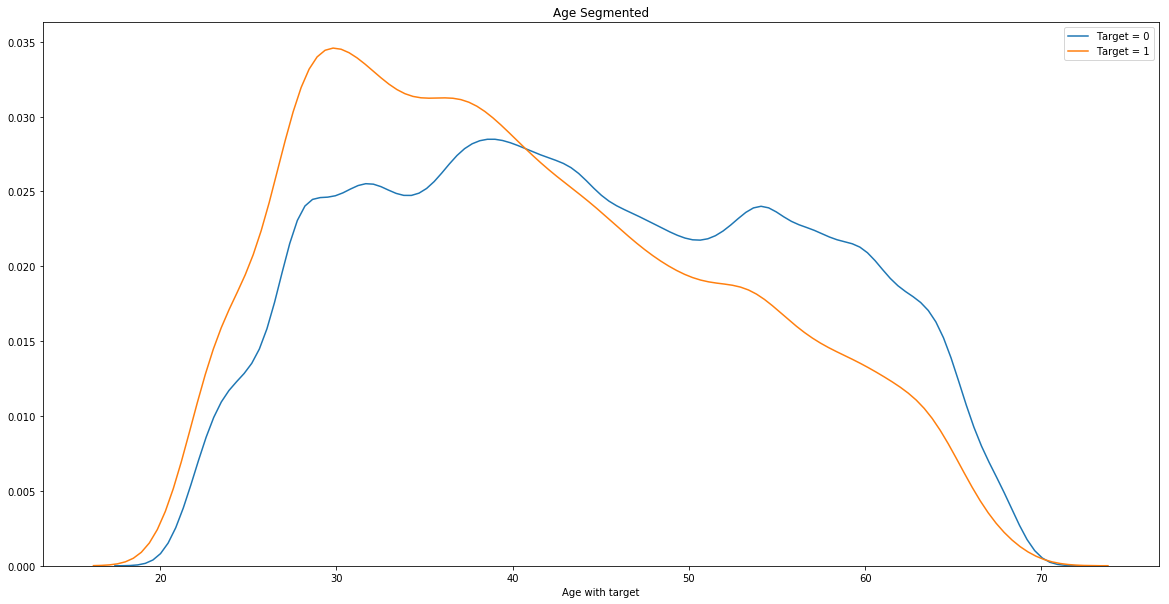

In [16]:
#Here by looking at graph even though it is good visualization, however could not figure complete default rate with related related to target

plt.figure(figsize = (20, 10))
sns.kdeplot(application_data.loc[application_data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='Target = 0')
sns.kdeplot(application_data.loc[application_data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='Target = 1')
plt.title('Age Segmented');
plt.xlabel('Age with target')
plt.show()

Based on the above graph, we can see people with the age around 30-35 makes more number of defaults, So, this means while giving the loan to those whose age is 30-35, we have to take more precautions

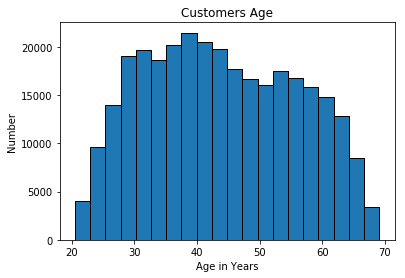

In [17]:
# Age in graph 
plt.hist(application_data['DOB_Years'], edgecolor = 'k', bins = 20)
plt.title('Customers Age');
plt.xlabel('Age in Years'); 
plt.ylabel('Number');

As per the value we can conclude that as the age gets increased , the loan defaulter number is decreasing. Since we got the negative correlation value.

In [18]:
# For creating Bins on the Age field, we are creating the new dataframe
df_age_bin = application_data[['TARGET', 'DOB_Years']]

# Bin the age data
df_age_bin['Years_of_Bin'] = pd.cut(df_age_bin['DOB_Years'], bins = np.linspace(20, 70, num = 11))

df_age_bin.describe()

,TARGET,DOB_Years
count,307511.000000,307511.000000
mean,0.080729,43.936973
std,0.272419,11.956133
min,0.000000,20.517808
25%,0.000000,34.008219
50%,0.000000,43.150685
75%,0.000000,53.923288
max,1.000000,69.120548


In [19]:
# Group by the bin and calculating their  averages

bin_age_group  = df_age_bin.groupby('Years_of_Bin').mean()
bin_age_group

,TARGET,DOB_Years
Years_of_Bin,,
"(20.0, 25.0]",0.123036,23.377522
"(25.0, 30.0]",0.111436,27.822518
"(30.0, 35.0]",0.102814,32.479037
"(35.0, 40.0]",0.089414,37.555913
"(40.0, 45.0]",0.078491,42.459346
"(45.0, 50.0]",0.074171,47.462741
"(50.0, 55.0]",0.066968,52.593136
"(55.0, 60.0]",0.055314,57.491131
"(60.0, 65.0]",0.052737,62.412459


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

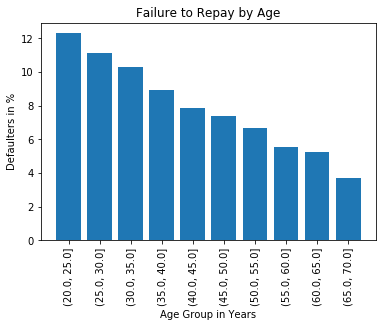

In [20]:
# Graph the age bins and the average of the target as a bar plot
plt.bar(bin_age_group.index.astype(str), 100 * bin_age_group['TARGET'])

# Plot labeling
plt.title('Failure to Repay by Age');
plt.xlabel('Age Group in Years');
plt.ylabel('Defaulters in %')
plt.xticks(rotation = 90)


The given shows the percentage distribution of defaulters among different age groups. Also it shows that at higher ages people are usually less likely to make faults in repayment.

In [21]:
application_data['AMT_INCOME_TOTAL'] = application_data['AMT_INCOME_TOTAL'].astype(float)
# For creating Bins on the Age field, we are creating the new dataframe
df_amt_bin = application_data[['TARGET', 'AMT_INCOME_TOTAL']]

# Bin the age data
df_amt_bin['Amt_Income_Bin'] = pd.cut(df_amt_bin['AMT_INCOME_TOTAL'], bins = np.linspace(45000, 900000, num = 20))

df_amt_bin.describe()

,TARGET,AMT_INCOME_TOTAL
count,307511.000000,3.075110e+05
mean,0.080729,1.687979e+05
std,0.272419,2.371231e+05
min,0.000000,2.565000e+04
25%,0.000000,1.125000e+05
50%,0.000000,1.471500e+05
75%,0.000000,2.025000e+05
max,1.000000,1.170000e+08


In [22]:
# Group by the bin and calculating their  averages
bin_amt_group  = df_amt_bin.groupby('Amt_Income_Bin').mean()
#bin_amt_group

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

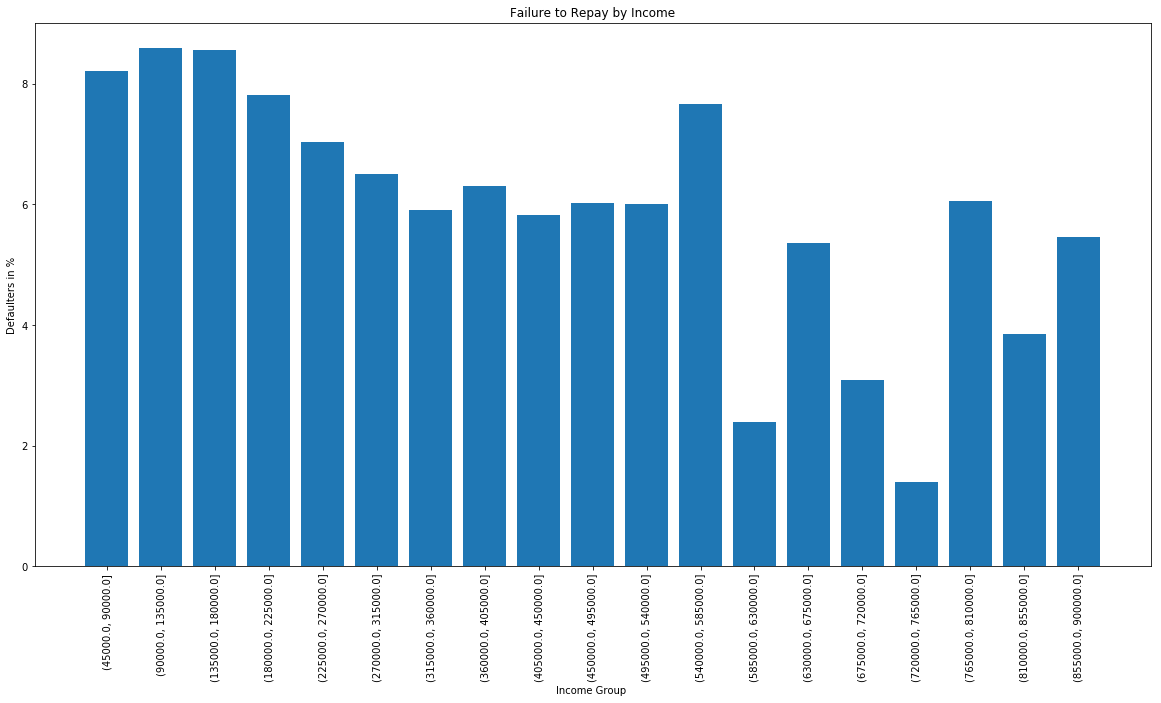

In [23]:
plt.figure(figsize = (20,10))
# Graph the age bins and the average of the target as a bar plot
plt.bar(bin_amt_group.index.astype(str), 100 * bin_amt_group['TARGET'])

# Plot labeling
plt.title('Failure to Repay by Income');
plt.xlabel('Income Group ');
plt.ylabel('Defaulters in %')
plt.xticks(rotation = 90)

We can see a pattern that people with less salary are likely to make more defaults in making repayment of loan

In [24]:
df1['Years_Employed'] = (df1['DAYS_EMPLOYED'] / -365)
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOB_Years,Years_Employed
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,...,24825.000000,24825.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,24825.000000,24825.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,-14884.828077,42394.675448,...,0.000524,0.000564,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783,40.780351,-116.149796
std,102383.123458,0.0,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,4192.844583,119484.634253,...,0.022878,0.023741,0.084926,0.106682,0.203941,0.745116,0.643789,1.934063,11.487245,327.355162
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,-25168.000000,-16069.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.035616,-1000.665753
25%,189555.000000,1.0,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,-18037.000000,-2156.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.221918,1.038356
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,-14282.000000,-1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,39.128767,2.832877
75%,366050.000000,1.0,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,-11396.000000,-379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,49.416438,5.906849
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,-7678.000000,365243.000000,...,1.000000,1.000000,2.000000,4.000000,6.000000,17.000000,19.000000,22.000000,68.953425,44.024658


In [25]:
application_data['Years_Employed'] = application_data['Years_Employed'].astype(int)
# For creating Bins on the Age field, we are creating the new dataframe
df_yrsemp_bin = application_data[['TARGET', 'Years_Employed']]

# Bin the age data
df_yrsemp_bin['Yrs_Emp_Bin'] = pd.cut(df_yrsemp_bin['Years_Employed'], bins = np.linspace(-40, 0, num = 10))

df_yrsemp_bin.describe()

,TARGET,Years_Employed
count,307511.000000,307511.000000
mean,0.080729,175.121693
std,0.272419,386.611073
min,0.000000,-49.000000
25%,0.000000,-7.000000
50%,0.000000,-3.000000
75%,0.000000,0.000000
max,1.000000,1000.000000


In [26]:
# Group by the bin and calculating their  averages
bin_yrs_group  = df_yrsemp_bin.groupby('Yrs_Emp_Bin').mean()
bin_yrs_group

,TARGET,Years_Employed
Yrs_Emp_Bin,,
"(-40.0, -35.556]",0.017391,-37.295652
"(-35.556, -31.111]",0.037606,-33.404451
"(-31.111, -26.667]",0.040689,-28.782991
"(-26.667, -22.222]",0.046710,-24.326381
"(-22.222, -17.778]",0.046526,-19.785265
"(-17.778, -13.333]",0.051328,-15.145529
"(-13.333, -8.889]",0.059679,-10.645280
"(-8.889, -4.444]",0.075443,-6.353371
"(-4.444, 0.0]",0.105712,-1.860509


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

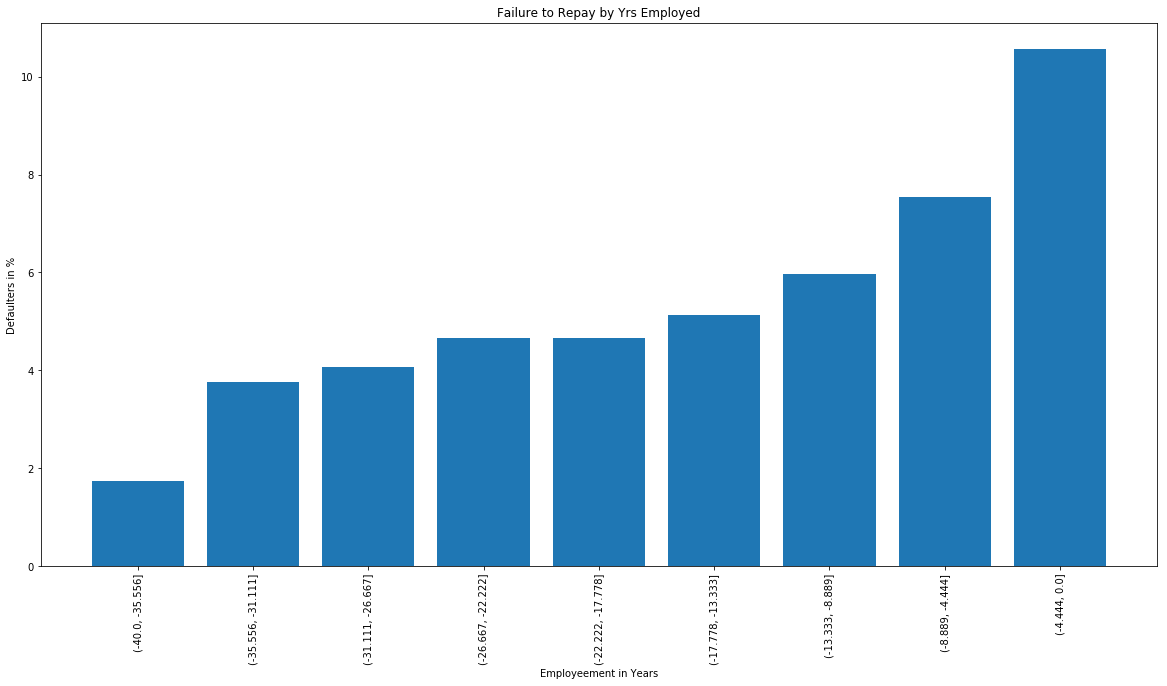

In [64]:
plt.figure(figsize = (20,10))
# Graph the age bins and the average of the target as a bar plot
plt.bar(bin_yrs_group.index.astype(str), 100 * bin_yrs_group['TARGET'])

# Plot labeling
plt.title('Failure to Repay by Yrs Employed');
plt.xlabel('Employeement in Years');
plt.ylabel('Defaulters in %')
plt.xticks(rotation = 90)


We can see a pattern that people with less salary are likely to make more defaults in making repayment of loan

In [29]:
# Steps to find the imbalance data

outlier = application_data[application_data['DAYS_EMPLOYED'] == 365243]
print('The outlier default of loans     : '+ str  (100*outlier['TARGET'].mean()))
non_outlier = application_data[application_data['DAYS_EMPLOYED'] != 365243]
print('The non_outlier default on loans : '+ str((100 * (non_outlier['TARGET'].mean()))))
print('The outliers days of employed    : '+ str(len(outlier)))

The outlier default of loans     : 5.399646043269405
The non_outlier default on loans : 8.65997453765215
The outliers days of employed    : 55374


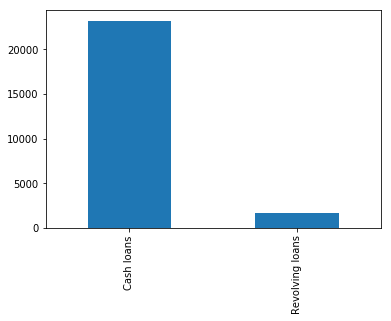

In [30]:
# ploting graph for 'NAME_CONTRACT_STATUS'
df1['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

If we look at the graph shown in this slide, we can easily conclude that tendency to make defaults in repayment of loan in Cash loans are very high as compared to revolving loans which means we need to be very-very careful while providing the cash loans.

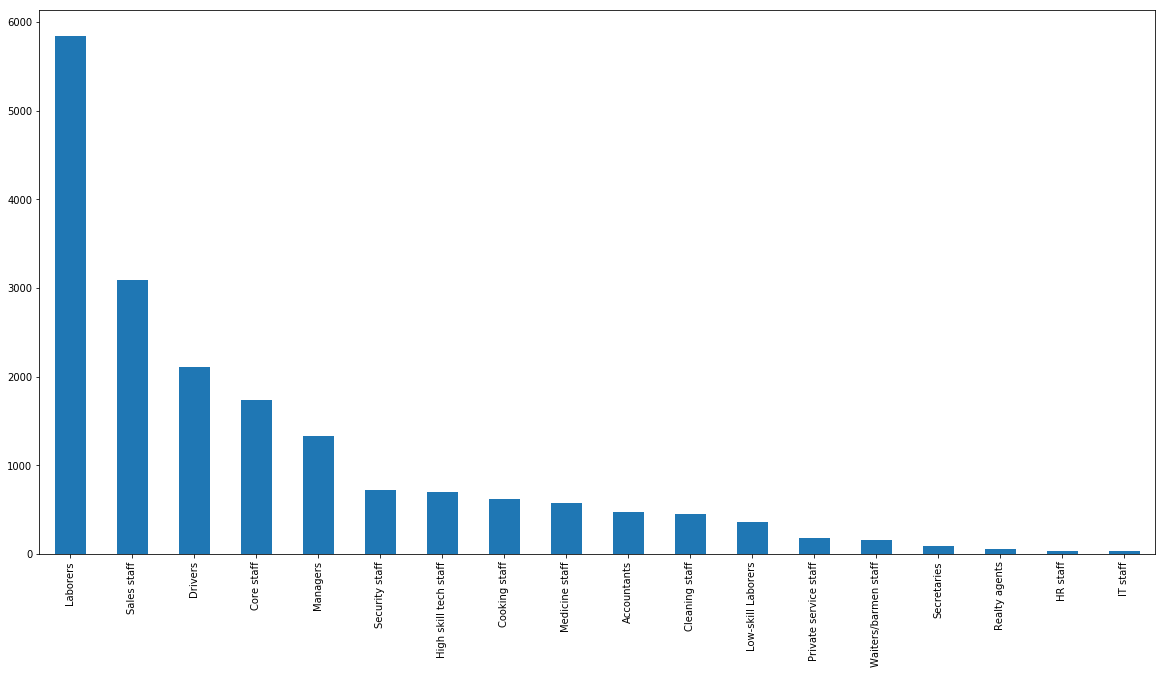

In [31]:
plt.figure(figsize = (20, 10))
df1['OCCUPATION_TYPE'].value_counts().plot.bar()

If we look at the graph shown in the two above, we clearly got to know that top 5 classes of occupation which means labourers, Sales staff, Drivers, Core staff and managers are the occupations which are approximately covers approximately 50-55% of the defaulters.

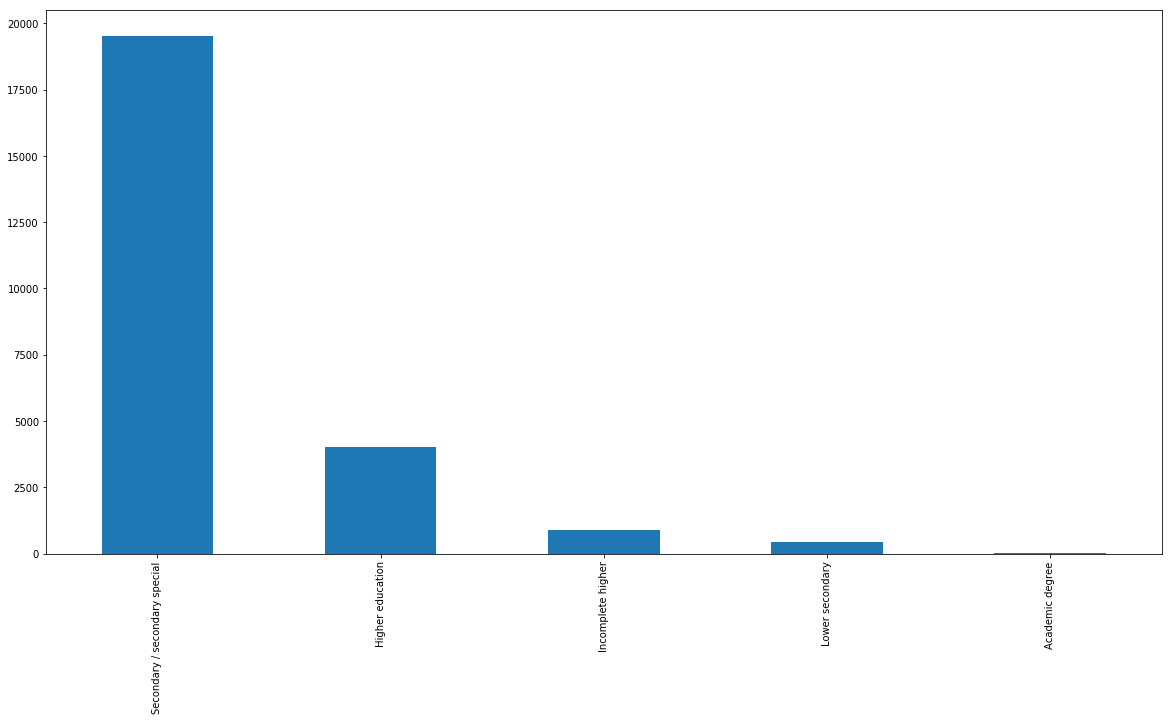

In [32]:
plt.figure(figsize = (20, 10))
df1['NAME_EDUCATION_TYPE'].value_counts().plot.bar()

If we look that the graph between number of defaulters and education level than we can conclude that those who are passed their secondary or less than that are those who makes maximum defaults necessary or precautions needs to be taken to decrease these defaulters

In [33]:
# Find correlations with the target and sort
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Least 10 Correlations:\n', correlations.tail(10))
print('\nTop 10 Correlations:\n', correlations.head(10))

Least 10 Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top 10 Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
TOTALAREA_MODE               -0.032596
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64


In [34]:
# Extract the EXT_SOURCE variables and show correlations
cor_data = application_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY']]
cor_data_corrs = cor_data.corr()
cor_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY
TARGET,1.000000,-0.155317,-0.160472,-0.044932,-0.078239,0.060893
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.289848,0.600610,-0.115374
EXT_SOURCE_2,-0.160472,0.213982,1.000000,-0.020767,0.091996,-0.288299
DAYS_EMPLOYED,-0.044932,0.289848,-0.020767,1.000000,0.615864,0.034624
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.615864,1.000000,-0.008073
REGION_RATING_CLIENT_W_CITY,0.060893,-0.115374,-0.288299,0.034624,-0.008073,1.000000


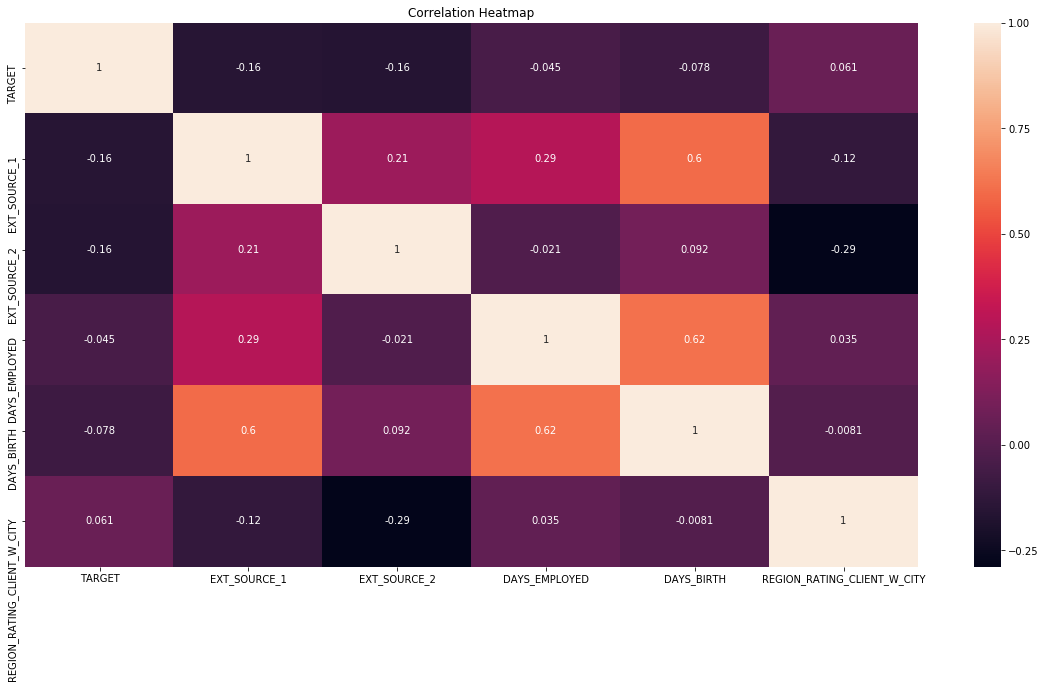

In [35]:
plt.figure(figsize = (20, 10))

# Heatmap of correlations
sns.heatmap(cor_data_corrs, annot = True)
plt.title('Correlation Heatmap');

The variable “REGION_RATING_CLIENT_W_CITY ”  mean rating of the region where client lives with taking city into account (1,2,3) ,since the correlation between target and REGION_RATING_CLIENT_W_CITY is 0.061 which means as the value REGION_RATING_CLIENT_W_CITY increases the chances of making defaults also increases, this shows that those who lives in city whose rating is 3 makes more no. of defaults.
Similarly, between the variables “Days employed” and “Target” correlation is -0.045 which means as the peoples experience level increases they are less likely to make defaults in repayment of loans.
Similarly, between the variables “Age” and “Target” correlation is -0.078 which means as the peoples age increases they are less likely to make defaults in repayment of loans

In [36]:
df_tar_sk_curr = application_data.iloc[:,0:2]

In [37]:
# df_tar_sk_curr

In [38]:
# Importing the dataset
previous_application_data = pd.read_csv(r"C:\Users\sesa505163\Downloads\previous_application.csv")
print(previous_application_data.shape)
previous_application_data.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
previous_application_drop = previous_application_data.drop_duplicates(['SK_ID_CURR'], keep='last')
# previous_application_drop

In [40]:
merge_app_pre = pd.merge(df_tar_sk_curr, previous_application_drop, on='SK_ID_CURR')
# merge_app_pre

In [41]:
# Steps to find the missing values

# Calculating the total number of missing values
missing_values_2 = merge_app_pre.isnull().sum()

# Calculating the % of the missing values
missing_value_percentage_2 = 100 * merge_app_pre.isnull().sum() / len(merge_app_pre)

 # Concatinating the two tables
missing_value_table_2 = pd.concat([missing_values_2, missing_value_percentage_2], axis=1)

# Renameing the column names
missing_value_table_columns_2 = missing_value_table_2.rename(columns={0: 'Number of Missing Values', 1: '% of Total Missing Values'})

# Display the values in sorting order
missing_value_table_columns_2 = missing_value_table_columns_2[missing_value_table_columns_2.iloc[:, 1] != 0].sort_values('% of Total Missing Values', ascending=False).round(1)
print("Total number of missing columns are: " + str(missing_value_table_columns_2.shape[0]))
print(missing_value_table_columns_2.head(100))

Total number of missing columns are: 15
                           Number of Missing Values  % of Total Missing Values
RATE_INTEREST_PRIMARY                        289431                       99.4
RATE_INTEREST_PRIVILEGED                     289431                       99.4
NAME_TYPE_SUITE                              139598                       48.0
AMT_DOWN_PAYMENT                             116509                       40.0
RATE_DOWN_PAYMENT                            116509                       40.0
DAYS_FIRST_DRAWING                            79691                       27.4
DAYS_FIRST_DUE                                79691                       27.4
DAYS_LAST_DUE_1ST_VERSION                     79691                       27.4
DAYS_LAST_DUE                                 79691                       27.4
DAYS_TERMINATION                              79691                       27.4
NFLAG_INSURED_ON_APPROVAL                     79691                       27.4
AMT_GOODS_PR

In [42]:
# Deleting the Columns for which the missing value is greater than 50%
df_missing_value = merge_app_pre.loc[:, (merge_app_pre.isnull().sum() <= len(merge_app_pre)/2)]
# df.columns

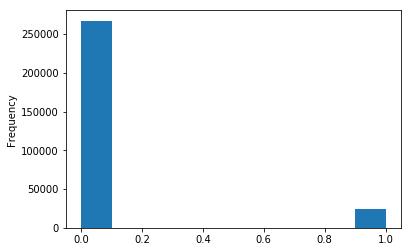

In [43]:
merge_app_pre['TARGET'].astype(int).plot.hist();

This shows that approximately 9% of total people in previous database are defaulters

In [44]:
# Spliting the Dataframe into two categories "Target = 0" 
df00 = merge_app_pre[merge_app_pre['TARGET'] == 0]
# print (df00)

In [45]:
# Spliting the Dataframe into two categories "Target = 1" 
df11 = merge_app_pre[merge_app_pre['TARGET'] == 1]
# print (df11)

In [46]:
# Number of unique classes in each object column
df11.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         23
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            24
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

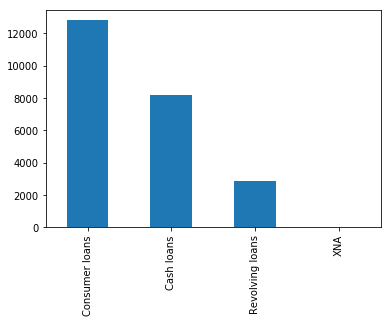

In [47]:
# ploting graph for 'NAME_CONTRACT_STATUS'
df11['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

The graph shows in this slide indicates approximately 50% of the total defaulters are those who took consumer loans.

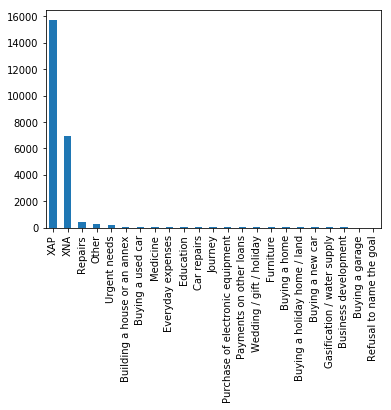

In [48]:
# ploting graph for 'NAME_CASH_LOAN_PURPOSE'
df11['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.bar()

The graph shows in this slide indicates approximately 50% of the total defaulters are those who took consumer loans.

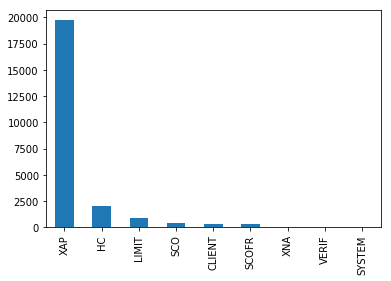

In [49]:
# ploting graph for 'CODE_REJECT_REASON'
df11['CODE_REJECT_REASON'].value_counts().plot.bar()

This Graph shows those who takes loan for XAP are approximately 65% likely to make defaults and XNA are approx. 30%.

In [50]:
df11.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE',
       'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

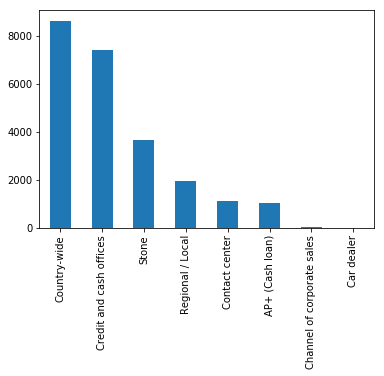

In [51]:
# ploting graph for 'CHANNEL_TYPE'
df11['CHANNEL_TYPE'].value_counts().plot.bar()

In [52]:
merge_app_pre['AMT_CREDIT'] = merge_app_pre['AMT_CREDIT'].astype(float)
# For creating Bins on the Age field, we are creating the new dataframe
df_amt_cred_bin = merge_app_pre[['TARGET', 'AMT_CREDIT']]

# Bin the age data
df_amt_cred_bin['AMT_CREDIT'] = pd.cut(df_amt_cred_bin['AMT_CREDIT'], bins = np.linspace(0, 1000000, num = 5))

# df_amt_cred_bin

In [53]:
# correlation
cor_data_PRE = merge_app_pre[['TARGET', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']]
cor_data_PRE_corrs = cor_data_PRE.corr()
cor_data_PRE_corrs


,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
TARGET,1.000000,-0.021701,-0.008822,-0.005646,-0.006970
AMT_ANNUITY,-0.021701,1.000000,0.802463,0.809831,0.815623
AMT_APPLICATION,-0.008822,0.802463,1.000000,0.971016,0.999948
AMT_CREDIT,-0.005646,0.809831,0.971016,1.000000,0.992700
AMT_GOODS_PRICE,-0.006970,0.815623,0.999948,0.992700,1.000000


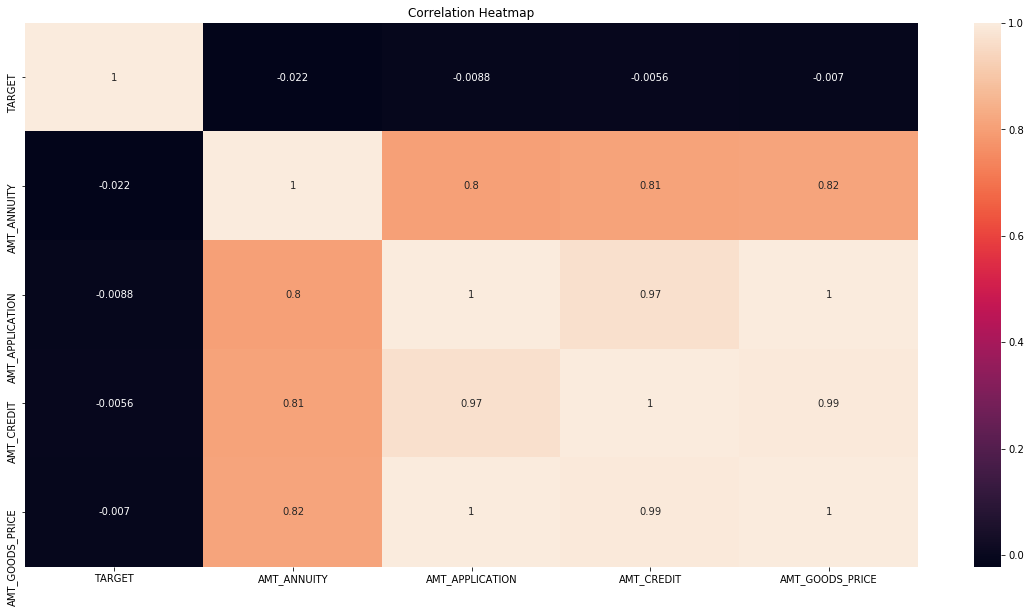

In [54]:
plt.figure(figsize = (20, 10))

# Heatmap of correlations
sns.heatmap(cor_data_PRE_corrs, annot = True)
plt.title('Correlation Heatmap');

The correlation between target and annuity amount is -0.022, which means as the annuity amount goes higher chances of making defaults decreases. That may be because the annuity amount is usually higher for those who have good source of income.     The correlation between application amount and target is -0.0088, which means as the application amount increases chance of making defaults in repayment decreases, that may be because higher amount of loan is provided usually a certain class of people, with good assets, which means there chances of making defaults are very less.     
The correlation between target and amount credit is -0.0056, which denotes that people who got higher amount of loans are less likely to make the defaults. This can be due to that the higher amount of loans are usually given against higher collateral security or someone who has good market value and assets, therefore these higher amount of loans seems to be less kind of those loans in which defaults for repayment happens.     
The correlation between the target and amount goods priced is -0.007, negative correlation shows that as the goods price increases the likelihood of making defaults in the repayment of loan is goes down, because these loans are against the property whose value is usually higher then the amount of loan credited.